In [2]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.cluster.vq import kmeans
import tensorflow as tf

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df = df.replace({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
df = df.replace({'D': 6,'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0})
df = df.replace({'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7})

<ipython-input-4-137c8216c1c3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
<ipython-input-4-137c8216c1c3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'D': 6,'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0})
<ipython-input-4-137c8216c1c3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [5]:
Y = df['price'].values[:5000]
Y = np.array([[valeur] for valeur in Y])

In [6]:
X = np.array(df[[ 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']].values)[:5000]

In [7]:
X_train, X_rmse, Y_train, Y_rmse = train_test_split(X, Y, test_size=0.1, random_state=1)

In [24]:
# Calcul de la RMSE
def calc_rmse(X_rmse,Y_rmse):
    Y_pred,_ = m.predict_f(X_rmse)
    rmse = 0
    for i in range(len(Y_rmse)):
        rmse += (Y_rmse[i] - Y_pred[i])**2
    rmse = np.sqrt(rmse / len(X_rmse))
    return float(rmse)

In [9]:
X_train = np.array(X_train, dtype=np.float64)
Y_train = np.array(Y_train, dtype=np.float64)
X_rmse = np.array(X_rmse, dtype=np.float64)
Y_rmse = np.array(Y_rmse, dtype=np.float64)

In [ ]:
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.GPR(data=(X_train, Y_train), kernel=k)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 3041.791209936142 secondes
La RMSE vaut: 225.66110354317794


<ipython-input-7-2ce815d630ad>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


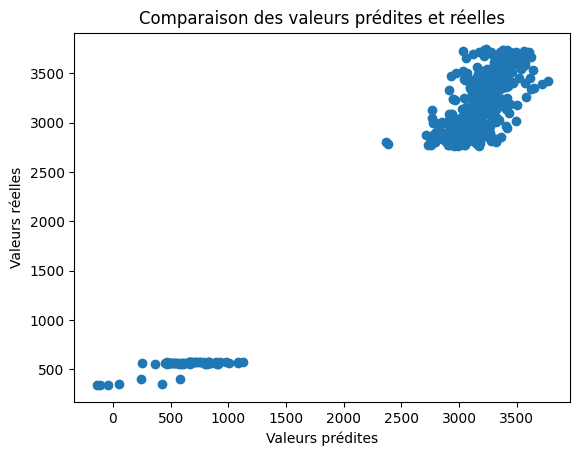

In [ ]:
def plot(X_rmse, Y_rmse):
    Y_pred = m.predict_f(X_rmse)[0]
    plt.scatter(Y_pred, Y_rmse)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Comparaison des valeurs prédites et réelles')
    plt.show()

plot(X_rmse, Y_rmse)

In [ ]:
n_inducing = int(len(X_train)/10)
inducing_variable, _ = kmeans(X_train, n_inducing)
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
m = gpflow.models.SGPR(data=(X_train, Y_train), kernel=k, inducing_variable=inducing_variable)  # Modèle de régression

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 220.76895213127136 secondes
La RMSE vaut: 279.62876101796144


<ipython-input-7-2ce815d630ad>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [ ]:
m = int(len(X_train)/10)
rng = np.random.default_rng(1234)
inducing_variable = rng.choice(X_train, size=m, replace=False)
# Création du modèle de régression Gaussienne avec GPflow
k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
# Model
m = gpflow.models.SGPR(
    data=(X_train, Y_train),
    kernel=k,
    inducing_variable=inducing_variable
)

start_time = time.time()
gpflow.optimizers.Scipy().minimize(m.training_loss, m.trainable_variables)
training_time = time.time() - start_time

# PRINT LES VALEURS UTILES
rmse = calc_rmse(X_rmse,Y_rmse)
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 199.74021697044373 secondes
La RMSE vaut: 264.6620273212603


<ipython-input-9-2ce815d630ad>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


In [27]:
M = 100  # Nombre de points d'induction
kernel = gpflow.kernels.RBF()
Z = X_train[:M, :]  # Points d'induction initialisés à partir des premiers points du jeu de données

# Initialiser le modèle SVGP
m = gpflow.models.SVGP(kernel=kernel,
                       likelihood=gpflow.likelihoods.Gaussian(),
                       inducing_variable=Z,
                       num_data=len(X_train))

# Optimisation avec Adam
minibatch_size = 50
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(len(X_train)).batch(minibatch_size)
train_iter = iter(train_dataset)

optimizer = tf.optimizers.Adam(learning_rate=0.01)

@tf.function
def optimization_step():
    # Crée un nouvel itérateur pour chaque appel
    train_iter = iter(train_dataset)
    with tf.GradientTape() as tape:
        loss = m.training_loss_closure(train_iter)()
    grads = tape.gradient(loss, m.trainable_variables)
    optimizer.apply_gradients(zip(grads, m.trainable_variables))

# Entraîner le modèle
num_iterations = 20000
start_time = time.time()
for i in range(num_iterations):
    optimization_step()
training_time = time.time() - start_time

# Calcul de la RMSE sur le jeu de test
rmse = calc_rmse(X_rmse, Y_rmse)

# Afficher les résultats
print("Temps d'entraînement:", training_time, "secondes")
print("La RMSE vaut:", rmse)

Temps d'entraînement: 276.7252461910248 secondes
La RMSE vaut: 240.1100039918894


<ipython-input-24-2ce815d630ad>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rmse)


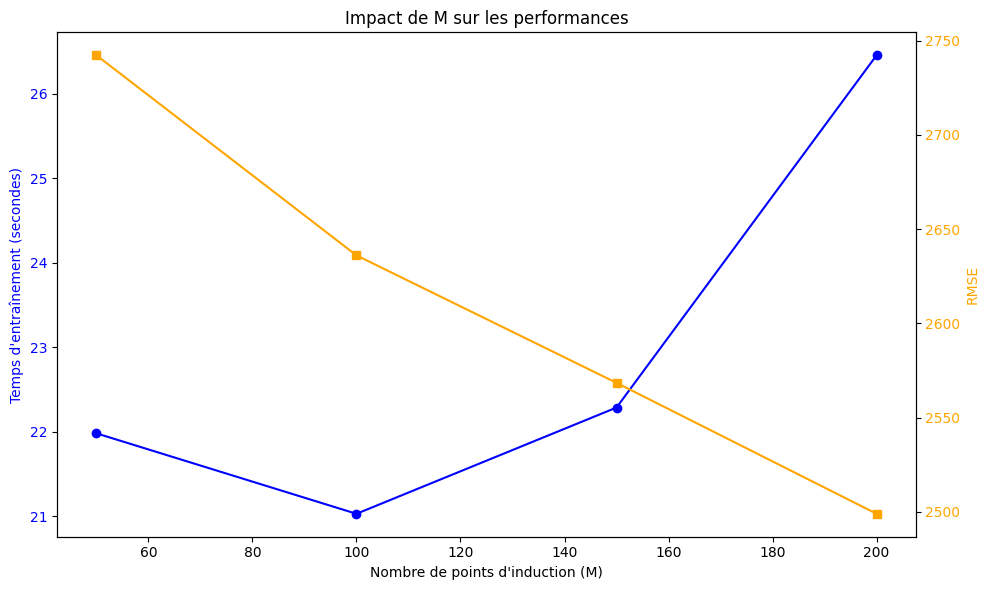

In [19]:
# Fonction RMSE
def calc_rmse(model, X_rmse, Y_rmse):
    y_pred_mean, _ = model.predict_f(X_rmse)
    return np.sqrt(np.mean((Y_rmse - y_pred_mean)**2))

# Paramètres
m_values = [50, 100, 150, 200]
fixed_num_iterations = 1000
fixed_minibatch_size = 50

results_M = []

for m in m_values:
    kernel = gpflow.kernels.RBF()
    Z = X_train[:m, :]
    model = gpflow.models.SVGP(kernel=kernel,
                                likelihood=gpflow.likelihoods.Gaussian(),
                                inducing_variable=Z,
                                num_data=len(X_train))

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(len(X_train)).batch(fixed_minibatch_size)
    optimizer = tf.optimizers.Adam(learning_rate=0.01)

    @tf.function
    def optimization_step(train_iter):
        with tf.GradientTape() as tape:
            loss = model.training_loss_closure(train_iter)()
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Chronométrage avec perf_counter
    start_time = time.perf_counter()
    for _ in range(fixed_num_iterations):
        train_iter = iter(train_dataset)
        optimization_step(train_iter)
    training_time = time.perf_counter() - start_time

    rmse = calc_rmse(model, X_rmse, Y_rmse)
    results_M.append((m, training_time, rmse))

# Afficher les résultats
results_M = np.array(results_M)

# Création du plot avec deux axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temps d'entraînement (axe principal)
ax1.plot(results_M[:, 0], results_M[:, 1], label="Temps d'entraînement", color="blue", marker='o')
ax1.set_xlabel("Nombre de points d'induction (M)")
ax1.set_ylabel("Temps d'entraînement (secondes)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# RMSE (axe secondaire)
ax2 = ax1.twinx()
ax2.plot(results_M[:, 0], results_M[:, 2], label="RMSE", color="orange", marker='s')
ax2.set_ylabel("RMSE", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Titre et ajustement
plt.title("Impact de M sur les performances")
fig.tight_layout()
plt.show()


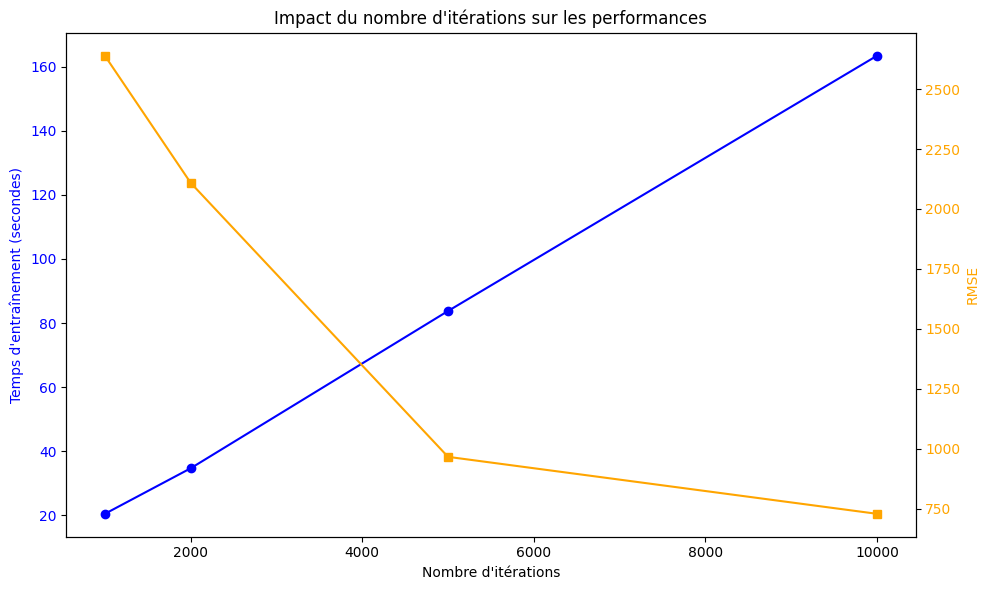

In [21]:
# Fonction RMSE
def calc_rmse(model, X_rmse, Y_rmse):
    y_pred_mean, _ = model.predict_f(X_rmse)
    return np.sqrt(np.mean((Y_rmse - y_pred_mean)**2))

# Paramètres
iteration_values = [1000, 2000, 5000, 10000]
fixed_M = 100
fixed_minibatch_size = 50

results_iterations = []

for num_iterations in iteration_values:
    kernel = gpflow.kernels.RBF()
    Z = X_train[:fixed_M, :]
    model = gpflow.models.SVGP(kernel=kernel,
                                likelihood=gpflow.likelihoods.Gaussian(),
                                inducing_variable=Z,
                                num_data=len(X_train))

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(len(X_train)).batch(fixed_minibatch_size)
    optimizer = tf.optimizers.Adam(learning_rate=0.01)

    @tf.function
    def optimization_step(train_iter):
        with tf.GradientTape() as tape:
            loss = model.training_loss_closure(train_iter)()
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Chronométrage avec perf_counter
    start_time = time.perf_counter()
    for _ in range(num_iterations):
        train_iter = iter(train_dataset)
        optimization_step(train_iter)
    training_time = time.perf_counter() - start_time

    rmse = calc_rmse(model, X_rmse, Y_rmse)
    results_iterations.append((num_iterations, training_time, rmse))

# Afficher les résultats
results_iterations = np.array(results_iterations)

# Création du plot avec deux axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temps d'entraînement (axe principal)
ax1.plot(results_iterations[:, 0], results_iterations[:, 1], label="Temps d'entraînement", color="blue", marker='o')
ax1.set_xlabel("Nombre d'itérations")
ax1.set_ylabel("Temps d'entraînement (secondes)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# RMSE (axe secondaire)
ax2 = ax1.twinx()
ax2.plot(results_iterations[:, 0], results_iterations[:, 2], label="RMSE", color="orange", marker='s')
ax2.set_ylabel("RMSE", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Titre et ajustement
plt.title("Impact du nombre d'itérations sur les performances")
fig.tight_layout()
plt.show()


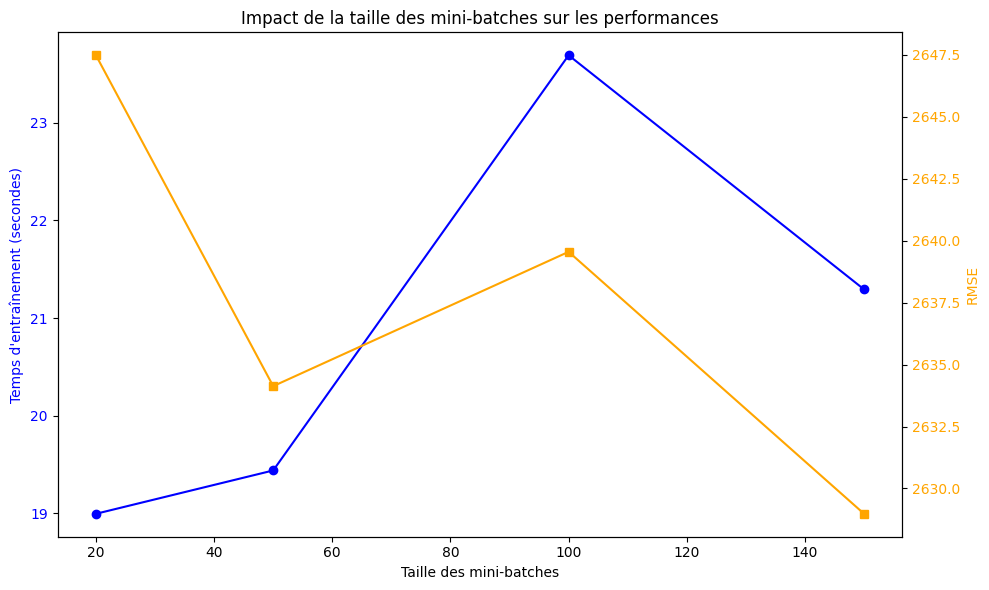

In [22]:
# Fonction RMSE
def calc_rmse(model, X_rmse, Y_rmse):
    y_pred_mean, _ = model.predict_f(X_rmse)
    return np.sqrt(np.mean((Y_rmse - y_pred_mean)**2))

# Paramètres
minibatch_sizes = [20, 50, 100, 150]
fixed_M = 100
fixed_num_iterations = 1000

results_minibatches = []

for minibatch_size in minibatch_sizes:
    kernel = gpflow.kernels.RBF()
    Z = X_train[:fixed_M, :]
    model = gpflow.models.SVGP(kernel=kernel,
                                likelihood=gpflow.likelihoods.Gaussian(),
                                inducing_variable=Z,
                                num_data=len(X_train))

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(len(X_train)).batch(minibatch_size)
    optimizer = tf.optimizers.Adam(learning_rate=0.01)

    @tf.function
    def optimization_step(train_iter):
        with tf.GradientTape() as tape:
            loss = model.training_loss_closure(train_iter)()
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Chronométrage avec perf_counter
    start_time = time.perf_counter()
    for _ in range(fixed_num_iterations):
        train_iter = iter(train_dataset)
        optimization_step(train_iter)
    training_time = time.perf_counter() - start_time

    rmse = calc_rmse(model, X_rmse, Y_rmse)
    results_minibatches.append((minibatch_size, training_time, rmse))

# Afficher les résultats
results_minibatches = np.array(results_minibatches)

# Création du plot avec deux axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temps d'entraînement (axe principal)
ax1.plot(results_minibatches[:, 0], results_minibatches[:, 1], label="Temps d'entraînement", color="blue", marker='o')
ax1.set_xlabel("Taille des mini-batches")
ax1.set_ylabel("Temps d'entraînement (secondes)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# RMSE (axe secondaire)
ax2 = ax1.twinx()
ax2.plot(results_minibatches[:, 0], results_minibatches[:, 2], label="RMSE", color="orange", marker='s')
ax2.set_ylabel("RMSE", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Titre et ajustement
plt.title("Impact de la taille des mini-batches sur les performances")
fig.tight_layout()
plt.show()
